# Name: Sangramjit Hazarika
# Course: Machine Learning with Python
# Email-id: sangramjithazarika123@gmail.com
# OUTSTANDING-1

In [304]:
import pandas as pd

# Dataset 

In [305]:
df = pd.read_csv('Loan_prediction.csv')

In [306]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


 fill the missing values for categorical terms using mode

In [308]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


fill the missing values for numerical terms using mean

In [310]:
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

dropping the Dependents and Loan_ID column

In [311]:
df['Dependents'].fillna(0.0, inplace=True)

In [312]:
df.drop(['Loan_ID'], axis="columns", inplace=True)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


Checking for null values

In [314]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Correlation Matrix

In [315]:
import seaborn as sb

In [316]:
df.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118202,0.030430,0.163106,-0.101054,-0.037392
ApplicantIncome,0.118202,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,0.030430,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.163106,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.101054,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.037392,-0.014477,-0.001665,-0.007738,0.001395,1.000000


<AxesSubplot:>

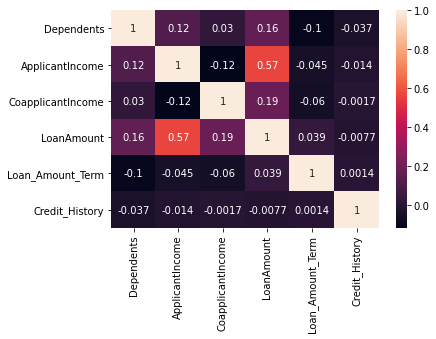

In [317]:
sb.heatmap(df.corr(), annot=True)

# Label Encoding

In [318]:
from sklearn.preprocessing import LabelEncoder

In [319]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']
for eachval in categorical_cols:
    le=LabelEncoder()
    df[eachval] = le.fit_transform(df[eachval])

In [320]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# Classification using Support Vector Machine Algorithm (SVC) and Random Forest Classifer Algorithm

In [321]:
from sklearn.svm import SVC

In [322]:
from sklearn.ensemble import RandomForestClassifier

In [323]:
svc = SVC()
rfc = RandomForestClassifier()

In [324]:
X = df[['Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']].values
Y = df[['Loan_Status']].values

In [325]:
from sklearn.model_selection import train_test_split

In [326]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42)

In [327]:
svc.fit(X_train, Y_train)

/Users/sangramjithazarika/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [328]:
rfc.fit(X_train, Y_train)

<ipython-input-328-96e8a0ce9cd3>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


RandomForestClassifier()

In [329]:
Y_pred_svc = svc.predict(X_test)

In [330]:
Y_pred_rfc = rfc.predict(X_test)

In [331]:
from sklearn.metrics import accuracy_score

In [332]:
accuracy_score(Y_test, Y_pred_svc)

0.6493506493506493

In [333]:
accuracy_score(Y_test, Y_pred_rfc)

0.7532467532467533

# Logistic Regression

In [334]:
from sklearn.linear_model import LogisticRegression

In [335]:
lr = LogisticRegression()

In [336]:
lr.fit(X_train, Y_train)

/Users/sangramjithazarika/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sangramjithazarika/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [337]:
Y_pred_lr = lr.predict(X_test)

In [338]:
from sklearn.metrics import accuracy_score

In [339]:
accuracy_score(Y_pred_lr, Y_test)

0.7792207792207793